In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
from numpy.linalg import norm
%matplotlib inline

In [3]:
#Question 1
# Spectral radiance is the rho(P)) term, and relates to how quickly a solution will converges.
#Small changes in spectral radiance greatly affects the amount of time for solutions to converge.
#A small spectral radiance would mean our solution converges faster.
#If spectral radiance were to be over one, our solutions would not converge

In [4]:
def test_converg(x_k, x_k1):
    return norm(x_k-x_k1, 2)/norm(x_k1, 2)

In [7]:
w = 1.15
x_k = np.zeros(5)
A = np.array([[3., -1., 0.,0.,0.],
     [-1., 3., -1.,0.,0.],
     [0., -1., 3.,-1.,0.],
     [0.,0.,-1.,3.,-1.],
     [0.,0.,0.,-1.,3.]])
b = np.array([[100.], [100.], [100.],[100.],[100.]])

In [8]:
#Jacobi Method - Captain Chapman showed me the zeros_like command
def jacobi(A, x_k, b):
    
    x_k1=np.zeros_like(b)
    
    for i in range(len(b)):
        sum1 = 0
        sum2 = 0
        
        for j in range(0, i):
            sum1 += A[i, j]*x_k[j]
        for j in range(i+1, len(A[0])):
            sum2 += A[i, j]*x_k[j]
            
        x_k1[i] = 1. / A[i, i] *(b[i]-sum1-sum2)
        
    return x_k1

In [10]:
x_k1 = cp.copy(x_k) 
conv = [1] 
numIter=0
while conv[-1] > 1e-6: 
    x_k = cp.copy(x_k1)
    x_k1 = jacobi(A, x_k, b)
    conv.append(test_converg(x_k, x_k1))
    numIter += 1
print ("The Jacobi Method took {} iterations and the solution is: \n{}".format(numIter, x_k1))

The Jacobi Method took 1 iterations and the solution is: 
[[61.11105884]
 [83.33323925]
 [88.88878435]
 [83.33323925]
 [61.11105884]]


In [11]:
#Gauss Seidel
def G_S(A, x_k, b):
    
    x_k1=np.zeros_like(b)
    
    for i in range(len(b)):
        sum1 = 0
        sum2 = 0
        
        for j in range(0, i):
            sum1 += A[i, j]*x_k1[j]
        for j in range(i+1, len(A[0])):
            sum2 += A[i, j]*x_k[j]
            
        x_k1[i] = 1. / A[i, i] *(b[i]-sum1-sum2)
        
    return x_k1

In [12]:
x_k1 = cp.copy(x_k) 
conv = [1] 
numIter=0
while conv[-1] > 1e-6: 
    x_k = cp.copy(x_k1)
    x_k1 = G_S(A, x_k, b)
    conv.append(test_converg(x_k, x_k1))
    numIter += 1
print ("The Gauss Seidel Method took {} iterations and the solution is: \n{}".format(numIter, x_k1))

The Gauss Seidel Method took 2 iterations and the solution is: 
[[61.1110844 ]
 [83.3332981 ]
 [88.88885791]
 [83.3333166 ]
 [61.11110553]]


In [13]:
#SOR Method
def SOR(A, x_k, b, w):
    
    x_k1=np.zeros_like(b)
    
    for i in range(len(b)):
        sum1 = 0
        sum2 = 0
        
        for j in range(0, i):
            sum1 += A[i, j]*x_k1[j]
        for j in range(i+1, len(A[0])):
            sum2 += A[i, j]*x_k[j]
            
        x_k1[i] = (1-w)*x_k[i] + w / A[i, i] *(b[i]-sum1-sum2)
        
    return x_k1

In [14]:
x_k1 = cp.copy(x_k) 
w=1.15
conv = [1] 
numIter=0
while conv[-1] > 1e-6: 
    x_k = cp.copy(x_k1)
    x_k1 = SOR(A, x_k, b,w)
    conv.append(test_converg(x_k, x_k1))
    numIter += 1
print ("The SOR Method took {} iterations and the solution is: \n{}".format(numIter, x_k1))

The SOR Method took 1 iterations and the solution is: 
[[61.11108823]
 [83.33330631]
 [88.88886826]
 [83.33332671]
 [61.11111146]]


In [15]:
#Problem 3

#Dimensions of cell
a = 4. # cm 
h = .1 # cm
n = int(2*a/h)+1


In [16]:
#Variables related to problem

S = 8. # n/cm**-1
Sig_a = .2
D = 1. #cm 
L_2 = D / Sig_a
L = np.sqrt(L_2)


In [17]:
#define matrices
A1 = np.zeros(n**2)
A1.shape = (n,n)
b1 = ((h**2) * S / D)
B1 = np.zeros(n)
B1.shape = (n,1)
x_axis = np.linspace(-a,a,n)

In [19]:
#initial conditions
for i in range(0,n):
    A1[i,i] = (2+ h**2/L_2)
    if i < n-1: A1[i,i+1] = -1
    if i > 0: A1[i,i-1] = -1

for i in range(0,n):
    B1[i,0]= b1

In [20]:
def thomas(A, b):
    
    # Initialize storage vectors for u and v and solution vector x.
    n = np.size(b)
    u = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    
    # Get initial values.
    u[0] = A[0,0]
    v[0] = b[0]
    
    # loop through the system.
    for i in range(1,n):
        
        u[i] = A[i,i] - (A[i,i-1]*A[i-1,i]) / u[i-1]
        v[i] = b[i] - (A[i,i-1]*v[i-1]) / u[i-1]
    
    # Now start backwards sub with n-1.
    x[n-1] = v[n-1]/u[n-1]
    
    # complete the backwards substitution.
    for i in range(n-2,-1,-1):
        x[i] = (v[i] - A[i,i+1]*x[i+1]) / u[i]
    return x

In [21]:
#compare calculated value to approximated by Thomas algorithm
thomas_ans = thomas(A1,B1)
true_flux = (S / Sig_a) * (1 - (np.exp(x_axis / L) + np.exp(-x_axis / L)) / (np.exp(a/L) + np.exp(-a/L)))
print(x_axis)

[-4.  -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7
 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3
 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1
  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5
  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4. ]


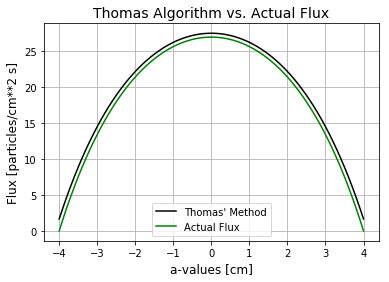

In [22]:
plt.plot(x_axis, thomas_ans, 'k', label = "Thomas' Method")
plt.plot(x_axis, true_flux, 'g', label = 'Actual Flux')
plt.xlabel("a-values [cm]",fontsize=12)
plt.ylabel('Flux [particles/cm**2 s]',fontsize=12)
plt.title('Thomas Algorithm vs. Actual Flux',fontsize=14)
plt.grid()
plt.legend();

In [23]:
max_error = abs(true_flux - thomas_ans)

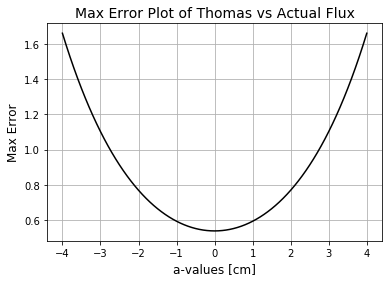

In [24]:
plt.plot(x_axis, max_error, 'k')
plt.xlabel("a-values [cm]",fontsize=12)
plt.ylabel('Max Error',fontsize=12)
plt.title('Max Error Plot of Thomas vs Actual Flux',fontsize=14)
plt.grid()